In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/luoyi/Desktop/bork.csv')

In [3]:
df.shape

(10000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Age              10000 non-null int64
HomeOwner        10000 non-null int64
Female           10000 non-null int64
Married          10000 non-null int64
HouseholdSize    10000 non-null int64
Income           10000 non-null float64
Education        10000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


In [5]:
df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education
0,51,1,1,1,4,171.0,15
1,37,1,1,1,3,96.0,18
2,53,1,1,1,6,86.0,20
3,33,1,1,1,2,176.0,18
4,46,1,1,1,6,420.0,15


In [6]:
for i in range(1,4):
    value_counts = df[df.columns[i]].value_counts()
    print('\n')
    print(value_counts)
    print('Total:', value_counts.sum())



1    8417
0    1583
Name: HomeOwner, dtype: int64
Total: 10000


1    7875
0    2125
Name: Female, dtype: int64
Total: 10000


1    7479
0    2521
Name: Married, dtype: int64
Total: 10000


In [7]:
df.columns[1]

'HomeOwner'

In [8]:
for i in range(0,7):
    print(i)

0
1
2
3
4
5
6


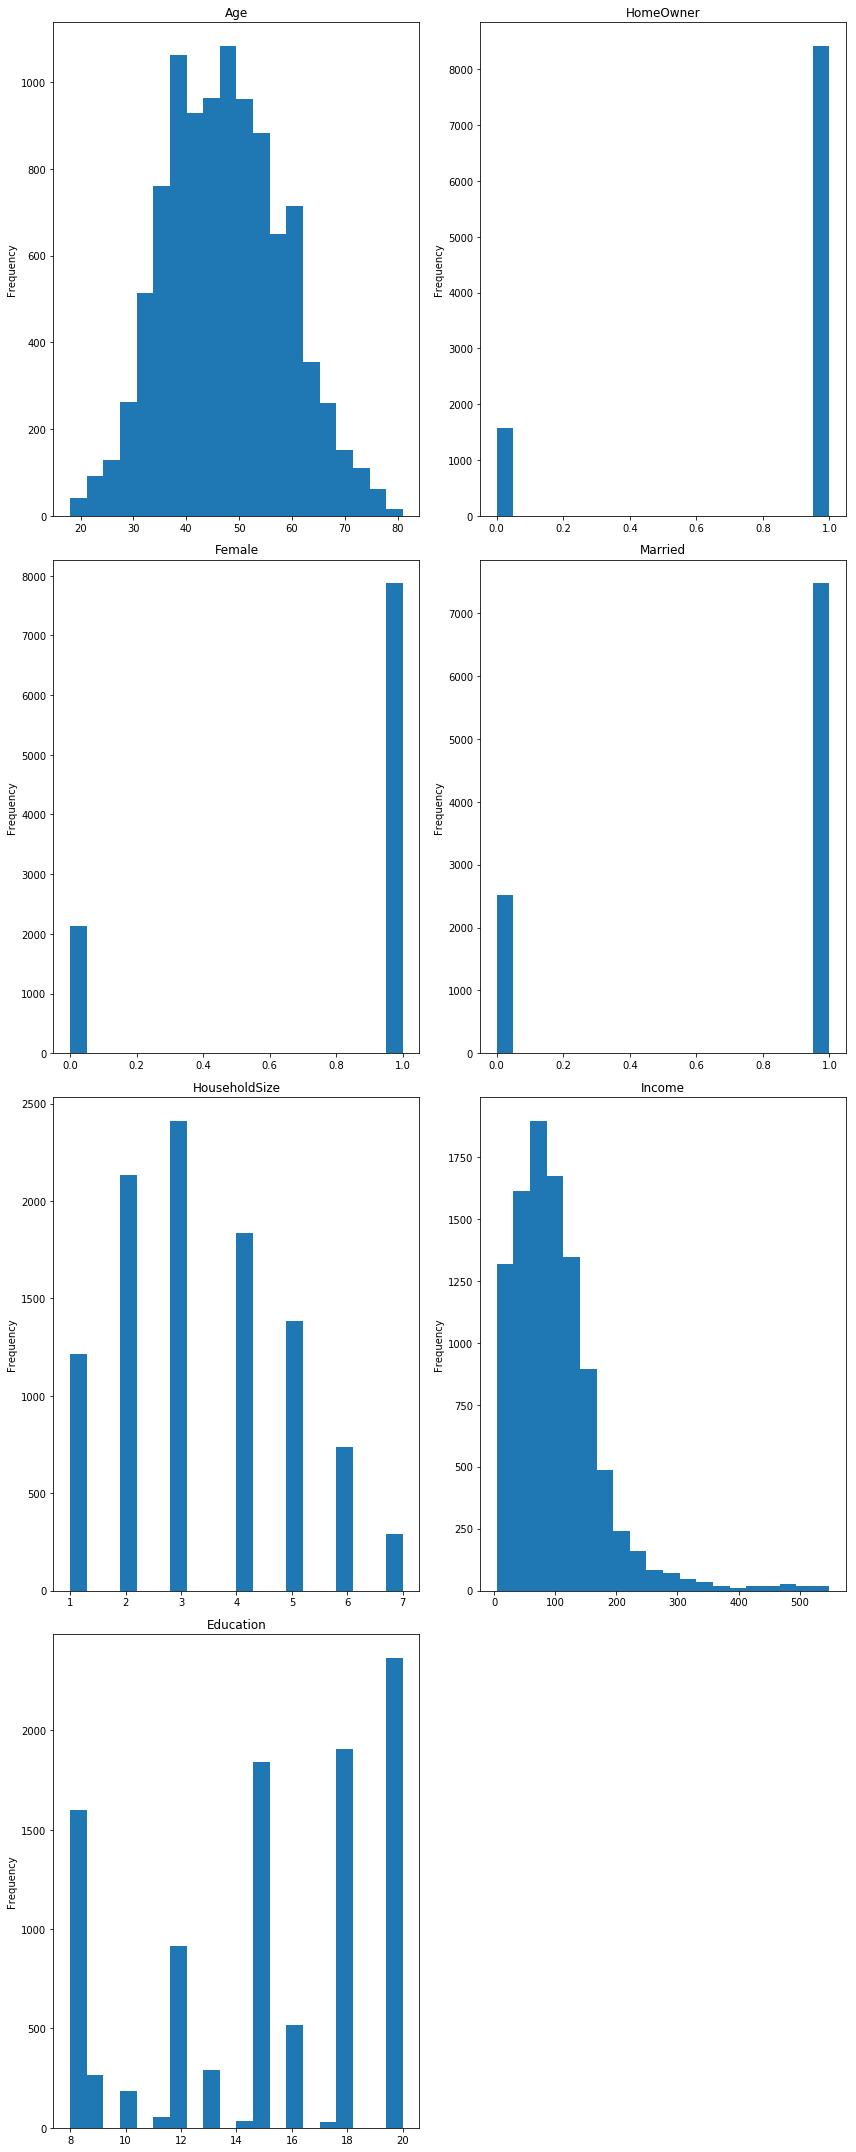

In [9]:
plt.figure(figsize=(12,30))
for i in range(0,df.shape[1]):
    plt.subplot(4, 2, i+1)
    plt.hist(df[df.columns[i]], bins=20)
    plt.title(df.columns[i])
    plt.ylabel('Frequency')
    plt.tight_layout()

In [10]:
df_s = scale(df) 

C:\Users\luoyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [11]:
df_s

array([[ 0.32503921,  0.43367241,  0.51946248, ...,  0.42195603,
         0.94788192, -0.01963188],
       [-0.93560541,  0.43367241,  0.51946248, ..., -0.21756508,
        -0.06579854,  0.68824853],
       [ 0.50513129,  0.43367241,  0.51946248, ...,  1.70099826,
        -0.20095593,  1.1601688 ],
       ...,
       [-1.1156975 , -2.30588798,  0.51946248, ..., -1.49660731,
        -1.16057344, -1.67135284],
       [-1.9261119 , -2.30588798, -1.92506684, ...,  1.06147715,
        -1.29573083, -0.96347243],
       [-1.9261119 , -2.30588798,  0.51946248, ..., -0.8570862 ,
        -1.2822151 , -1.67135284]])

Text(0.5, 1.0, 'SSE vs. K')

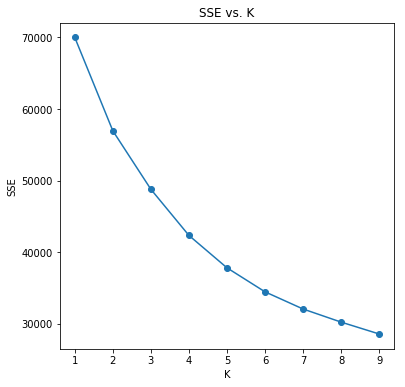

In [12]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_s)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

In [13]:
# select k = 4
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_s)

In [14]:
df1=df.copy()

In [15]:
df1['Cluster Labels']=kmeans.labels_

In [16]:
df1.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Cluster Labels
0,51,1,1,1,4,171.0,15,3
1,37,1,1,1,3,96.0,18,3
2,53,1,1,1,6,86.0,20,3
3,33,1,1,1,2,176.0,18,3
4,46,1,1,1,6,420.0,15,3


In [17]:
cluster1 = df1.loc[df1['Cluster Labels']==0]

In [18]:
df.describe()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education
count,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,47.390300,0.84170,0.787500,0.74790,3.340200,100.868290,15.083200
std,11.105985,0.36504,0.409097,0.43424,1.563748,73.991512,4.238216
min,18.000000,0.00000,0.000000,0.00000,1.000000,4.000000,8.000000
25%,39.000000,1.00000,1.000000,0.00000,2.000000,52.000000,12.000000
50%,47.000000,1.00000,1.000000,1.00000,3.000000,88.000000,15.000000
75%,55.000000,1.00000,1.000000,1.00000,4.000000,133.000000,18.000000
max,81.000000,1.00000,1.000000,1.00000,7.000000,549.000000,20.000000


In [19]:
cluster1.describe()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Cluster Labels
count,1408.000000,1408.000000,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,1408.0
mean,48.106534,0.995028,0.0,0.954545,3.758523,112.794389,15.640625,0.0
std,10.977654,0.070359,0.0,0.208373,1.343572,77.519726,3.882620,0.0
min,21.000000,0.000000,0.0,0.000000,2.000000,4.000000,8.000000,0.0
25%,40.000000,1.000000,0.0,1.000000,3.000000,62.375000,13.000000,0.0
50%,48.000000,1.000000,0.0,1.000000,4.000000,98.500000,16.000000,0.0
75%,56.000000,1.000000,0.0,1.000000,5.000000,143.000000,20.000000,0.0
max,79.000000,1.000000,0.0,1.000000,7.000000,549.000000,20.000000,0.0


In [20]:
cluster2 = df1.loc[df1['Cluster Labels']==1]
cluster2.describe()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Cluster Labels
count,1907.000000,1907.0,1907.000000,1907.0,1907.000000,1907.000000,1907.000000,1907.0
mean,48.851075,1.0,0.812795,0.0,1.917672,71.490823,15.695857,1.0
std,11.576510,0.0,0.390178,0.0,1.198126,56.315262,4.402708,0.0
min,19.000000,1.0,0.000000,0.0,1.000000,4.000000,8.000000,1.0
25%,40.000000,1.0,1.000000,0.0,1.000000,33.000000,12.000000,1.0
50%,49.000000,1.0,1.000000,0.0,1.000000,59.000000,18.000000,1.0
75%,57.000000,1.0,1.000000,0.0,3.000000,98.000000,20.000000,1.0
max,79.000000,1.0,1.000000,0.0,7.000000,492.000000,20.000000,1.0


In [21]:
cluster3 = df1.loc[df1['Cluster Labels']==2]
cluster3.describe()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Cluster Labels
count,1576.000000,1576.0,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.0
mean,46.861675,0.0,0.771574,0.661802,3.144670,86.419987,12.679569,2.0
std,11.539741,0.0,0.419952,0.473246,1.566923,68.781651,4.789485,0.0
min,20.000000,0.0,0.000000,0.000000,1.000000,4.000000,8.000000,2.0
25%,38.000000,0.0,1.000000,0.000000,2.000000,38.000000,8.000000,2.0
50%,47.000000,0.0,1.000000,1.000000,3.000000,72.000000,12.000000,2.0
75%,54.250000,0.0,1.000000,1.000000,4.000000,117.000000,18.000000,2.0
max,80.000000,0.0,1.000000,1.000000,7.000000,546.000000,20.000000,2.0


In [22]:
cluster4 = df1.loc[df1['Cluster Labels']==3]
cluster4.describe()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Cluster Labels
count,5109.000000,5109.0,5109.0,5109.000000,5109.000000,5109.000000,5109.000000,5109.0
mean,46.810726,1.0,1.0,0.996673,3.816207,113.004013,15.442357,3.0
std,10.762183,0.0,0.0,0.057594,1.398093,76.461833,3.816572,0.0
min,18.000000,1.0,1.0,0.000000,2.000000,4.000000,8.000000,3.0
25%,39.000000,1.0,1.0,1.000000,3.000000,65.000000,12.000000,3.0
50%,47.000000,1.0,1.0,1.000000,4.000000,100.000000,15.000000,3.0
75%,54.000000,1.0,1.0,1.000000,5.000000,144.000000,18.000000,3.0
max,81.000000,1.0,1.0,1.000000,7.000000,549.000000,20.000000,3.0
